<a href="https://colab.research.google.com/github/Jungseunggi/Section4_week1/blob/main/Section4_week1_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. 신경망에서 고려해야 할 요소**

##**1.1 학습률**

> **경사하강법 수식**



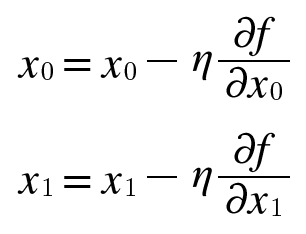

이미지 출처 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=ssdyka&logNo=221300959357

* 위 식에서 볼 수 있듯이 해당지점에서의 기울기를 구하여 감소하는 방향으로 진행(경사하강법을 사용하기 때문)

* 기호 에타(η) 즉 학습률은 얼마나 이동할지 또는 보폭이라 생각하면 편함

* 구해진 기울기 값을 얼마나 경사하강법에 적용할지 결정하는 하이퍼파라미터

> **학습률이 클때 vs 작을때**

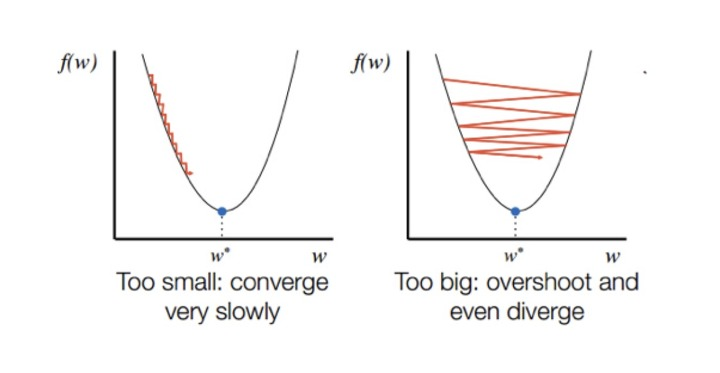

이미지 출처 : https://brunch.co.kr/@namujini/23

* 너무 작으면 주어진 iteration 내에서 최적점에 도달하지 못함
* 너무 크면 하강 과정에서 발산하면서 최적점을 찾지 못함

> **학습률 감소법**

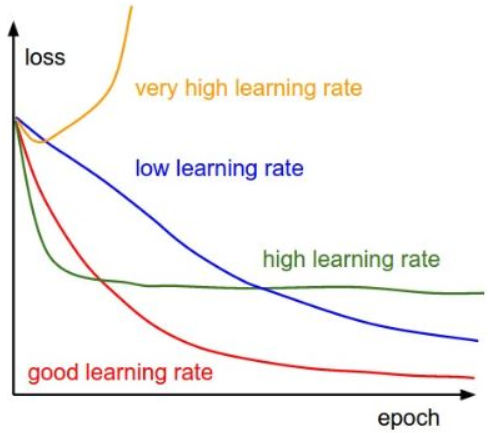

이미지 출처 : https://bioinformaticsandme.tistory.com/130

* low learning rate : 손실감소가 선형의 형태를 보이면서 천천히 학습됨, 따라서 많은 epoch가 요구됨

* high learning rate : 손실감소가 지수적인(exponential) 형태를 보이며, 구간에 따라 빠른 학습 또는 정체가 보임

* very high learning rate : 경우에 따라 오히려 손실을 증가시키는 상황 발생

* good learning rate : 적절한 학습 곡선의 형태, learning rate를 조절하면서 찾아내야함

* **높은 learning rate에서 시작을 하고 epoch가 증가할수록 learning rate를 낮추는 방법이 좋을 것 같음**




```
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1 = 0.89) #하이퍼파리미터(lr, default = 0.001)를 조절하면서 변화시킬 수 있음
             , loss='sparse_categorical_crossentropy'
             , metrics=['accuracy'])
```



> **Learning Rate Schedules(학습률 계획법) and Adaptive Learning Rate Methods(적응적 학습률)**



* **학습률 계획법이란?**  학습률 일정은 미리 정의된 일정에 따라 학습률을 줄여 훈련 중 학습률을 조정

* 

웜업에서 가중치를 끌어올림 

##**1.2 가중치 초기화(Weight Initialization)**

###**1.2.1 가중치 초기화를 하는 이유??**

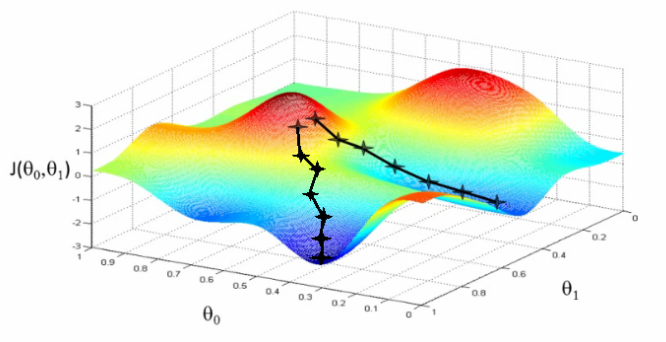

이미지 출처 : https://medium.com/coinmonks/loss-optimization-in-scientific-python-d1efbbe87171

예를 들어, 어떤 데이터셋의 손실 함수 그래프가 위와 같이 나옴.

그런데 동일하게 경사 하강법을 따라서 내려가더라도 도달하는 최저점이 다른 것을 볼 수 있음.

이처럼 첫 위치를 잘 정하는 것도 좋은 학습을 위한 조건 중 하나

때문에 학습 시작 시점의 가중치를 잘 정해야 함.

###**1.2.2 가중치 초기화 종류**


> **Zero initialization**

* 모든 가중치를 0으로 놓고 시작
* 파라미터의 값이 모두 같다면 역전파(Back propagation)를 통해서 갱신하더라도 모두 같은 값으로 변함
* 신경망을 구성하는 의미가 사라짐

> **Xavier Initialization**

*  은닉층의 노드의 개수가 n 개이고 현재 은닉층의 노드가 m 개일 때, 2/√(n+m) 을 표준편차로 하는 정규분포로 가중치를 초기화
* 아래 그림처럼 활성값이 분포가 고르게 됨
* 층마다 노드 개수를 다르게 설정하더라도 이에 맞게 가중치가 초기화됨

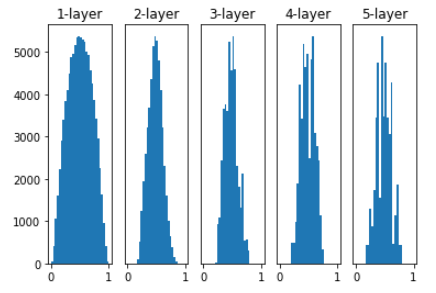

이미지 출처 : https://yngie-c.github.io/deep%20learning/2020/03/17/parameter_init/



```
# TensorFlow
tf.keras.initializers.GlorotNormal()

# PyTorch
torch.nn.init.xavier_normal_()
```



> **He Initialization**

* ReLU함수를 활성화 함수로 사용할 때 추천되는 초기화 방법
* He 초기화는 √(2/n) 를 표준편차로 하는 정규분포로 초기화
* 아래 첫번째 그래프를 보면 사비에르 초기화 시 층이 더 깊어진다면 0에 가까워지면서 기울기 소실이 발생
* 아래 두번째 그래프를 보면 층이 깊어지더라도 모든 활성값이 고른 분포를 보이는 것을 알 수 있음

활성화 함수가 ReLU 함수인 5층 신경망에서 사비에르 초기화를 적용

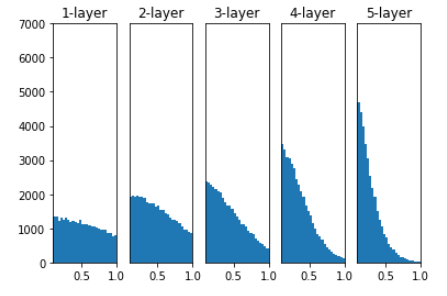


He 초기화를 사용


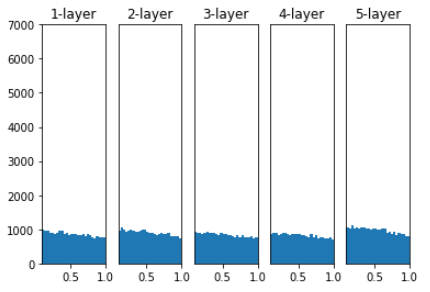

이미지 출처 : https://yngie-c.github.io/deep%20learning/2020/03/17/parameter_init/



```
# TensorFlow
tf.keras.initializers.HeNormal()

# PyTorch
torch.nn.init.kaiming_normal_()
```



##**1.3 과적합 방지(regularization)**

> **Weight Decay (가중치 감소)**

* 과적합은 가중치의 값이 클 때 주로 발생
* 가중치 값이 너무 커지지 않도록 조건을 추가
* 손실 함수(Cost function)에 가중치와 관련된 항을 추가

> **Dropout (드롭아웃)**

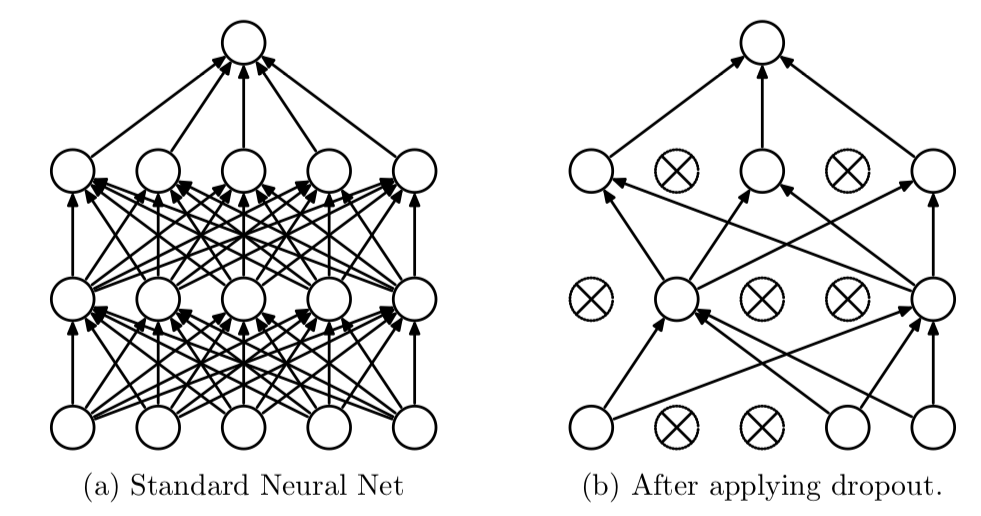

이미지 출처 : https://ai-pool.com/a/s/dropout-in-deep-learning

* Dropout은 신경망에서 **훈련 중**에 삭제 또는 무시
* 다른 뉴런이 일시적으로 네트워크에서 제거
* Dropout 을 적용할 때에는 0~1 사이의 실수


Keras 에서는 아래와 같이 Dropout 을 적용하고 싶은 층 다음에 Dropout 함수를 추가,
바로 위에 레이어에 영향을 끼침



```
Dense(64,
      kernel_regularizer=regularizers.l2(0.01),
      activity_regularizer=regularizers.l1(0.01))
Dropout(0.5)
```



> **Early Stopping (조기 종료)**

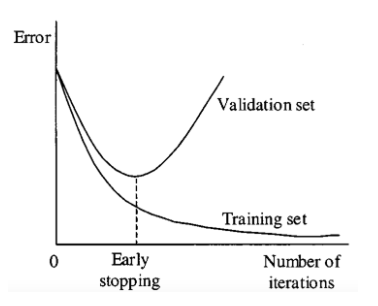

이미지 출처 : https://stat.paperswithcode.com/method/early-stopping

* 매개변수 업데이트가 **검증 세트**에서 더 이상 개선을 산출하기 시작하지 않을 때 훈련을 중지하는 심층 신경망을 위한 정규화 기술
* 훈련 중에 현재 최고의 매개변수를 저장하고 업데이트하며 매개변수 업데이트가 더 이상 개선을 가져오지 않을 때(설정된 반복 수 후) 훈련을 중단하고 마지막으로 가장 좋은 매개변수를 사용



파일 저장경로 설정
```
checkpoint_filepath = "FMbest.hdf5"

tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
```

https://keras.io/api/callbacks/early_stopping/
이건 좀 더 공부하고 작성

